In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product 
from pandas import DataFrame

# Import BeamSection module from FlightBEND
from FlightBEND.beam_section import BeamSection

# Disabling interactive plots (to easily edit detail plots)
plt.ioff() 

In [2]:
## Import mesh, with trailing edge, 8 stringers, 1858 elements
from meshes.NACA0015_WithTE_8str_1858e  import dados as data; 

In [3]:
# Check for orphan nodes
all_nodes = range(len(data['coordinates'])) # lista de 0 a nNos
unique_nodes = np.unique(data['elements'])

diff = np.setdiff1d(all_nodes, unique_nodes)
print('Unused nodes:')
print(diff)

Unused nodes:
[]


In [4]:
## Unpacking mesh data
# This mesh was drawn in meters, converting to mm
secNodes    = data['coordinates'] *1e3
secElems    = data['elements']

# This mesh was made with two materials, making it homogeneous
secYoung    = data['materials'][:,0]
secNu       = data['materials'][:,1]
secRho      = data['materials'][:,2]

# Instancing
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)


Area properties integration time:    2.438 seconds
Global stiffness assembly time:      5.259 seconds
System solve time:                   0.023 seconds
Shear center integration time:       3.050 seconds
Torsional constant integration time: 2.788 seconds


(0.0, 976.0, -74.92999999999999, 74.92999999999999)

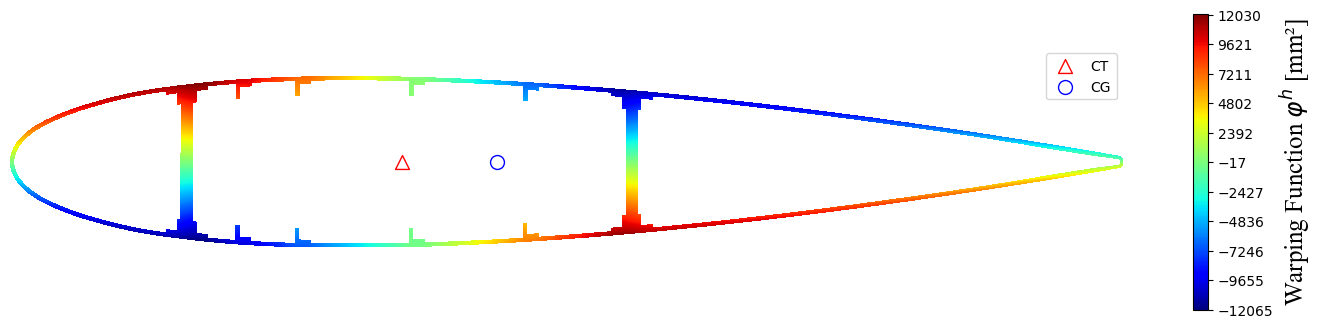

In [5]:
## Warping function
fig, ax = sec.plotWarping(levels=255, showMesh=False, unit='mm', 
                        figsize=(15,4),
                        cbarKwargs=dict(shrink=.8))

# Remove axis frame and reposition legend 
ax.get_legend().set_bbox_to_anchor([1,1])
ax.axis('off')

(-48.800000000000004, 1024.8, -82.42299999999999, 82.42299999999999)

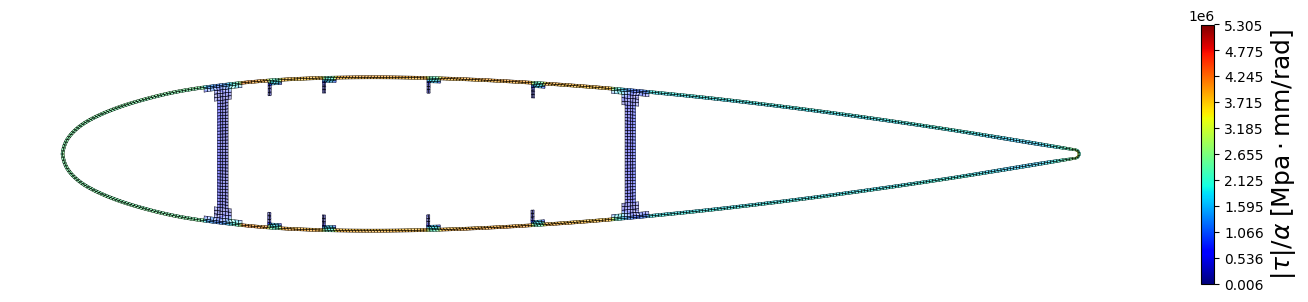

In [6]:
## Shear stresses (Vector field)
fig2, ax2 = sec.plotShearStresses(degree=4, 
                                  width=.2,scale=.5, headlength=5, 
                                  figsize=(15,4), cbarKwargs=dict(shrink=.7))
fig2.tight_layout()
# Remove axis frame 
ax2.axis('off')

{(0.2126222808363991,
  975.9449011514173,
  -74.76364266193126,
  74.76502371189294)}

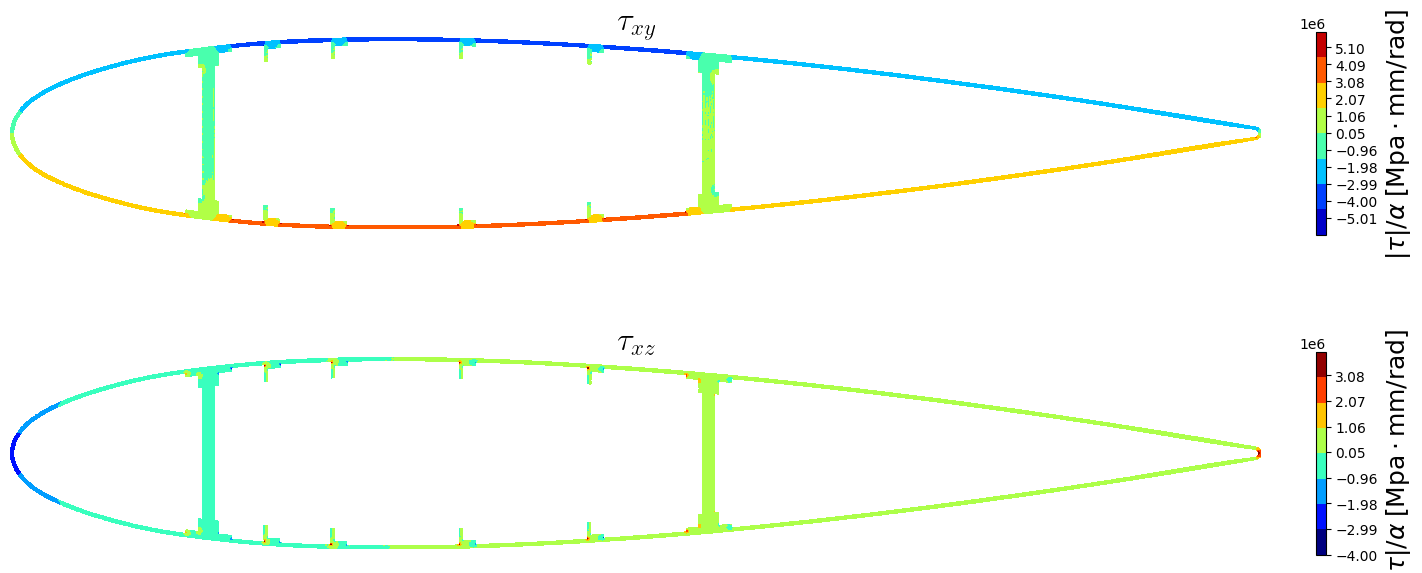

In [7]:
## Shear stresses (component wise scalar fields)
fig3, ax3 = sec.plotShearStresses(degree=4, mode='scalar',showMesh=False,
                                  figsize=(15,4),
                                  cbarKwargs=dict(shrink=.45))
fig3.tight_layout()
# Remove axis frame 
{ax.axis('off') for ax in ax3}
# fig3

### Details

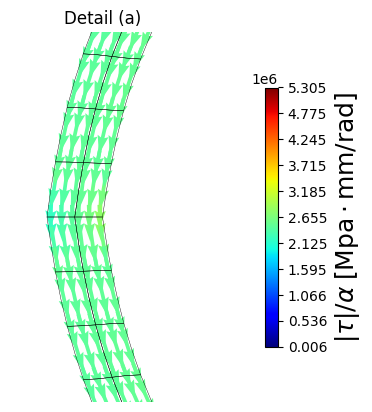

In [8]:
ax2.set_title('Detail (a)')
ax2.set_xlim([-2,8])
ax2.set_ylim([-10,10])
fig2

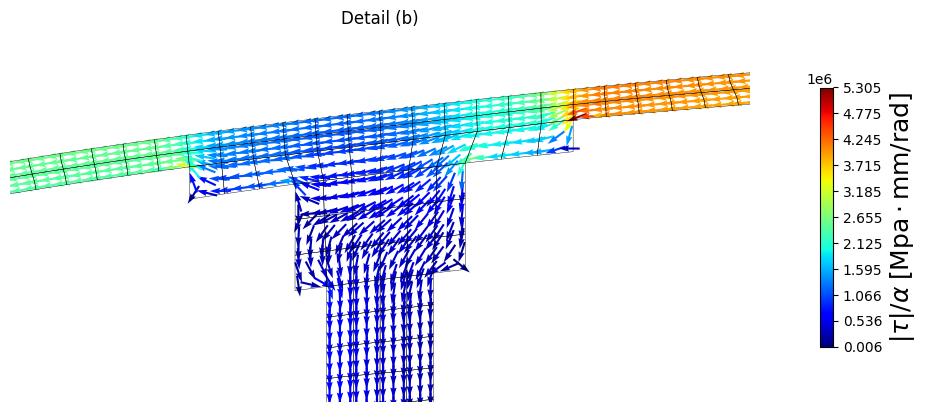

In [9]:
ax2.set_title('Detail (b)')
ax2.set_xlim([120,190])
ax2.set_ylim([40,75])
fig2

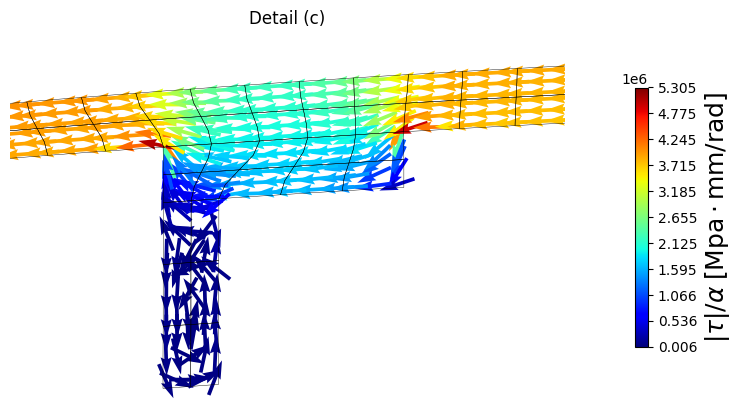

In [10]:
ax2.set_title('Detail (c)')
ax2.set_xlim([190,220])
ax2.set_ylim([55,75])
fig2

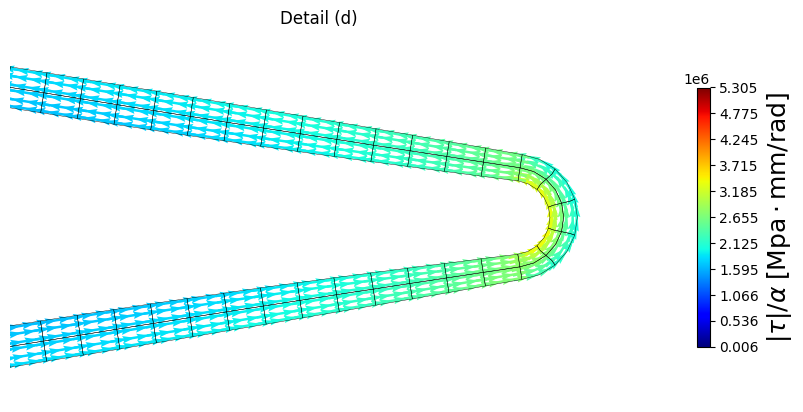

In [11]:
ax2.set_title('Detail (d)')
ax2.set_xlim([930,980])
ax2.set_ylim([-15,15])
fig2